# All tests against different datasets 

These data sets are retrieved from [https://rivetval.web.cern.ch/rivetval/HEPMC/](https://rivetval.web.cern.ch/rivetval/HEPMC/)  and are 

- `LHC-13-Minbias` 
- `LHC-13-Top-All`
- `LEP-93.0` 
- `BFactory-10.45` 
- `LHC-7-DiJets-2-C` 

The `hepmc.gz` files are unpacked and placed in the subdirectory [`input`](../input). 

All the files are in HepMC2 ASCII (aka. `IO_GenEvent`) format.  This mainly affects the `read` times. 

The current `master` branch is in all cases in  <span style='color:#1f77b4'>blue</span>, while `hepmc4` project is in <span style='color:#ff7f0e'>orange</span>.  

The plots shows the average time per event $\langle t\rangle$ to do an operation on an event as a function of the number of particles in the events $N$.   A number of functions are fitted to each distribution to try to extract the trend-line, or _complexity_ of each operation.  The function tried are 

\begin{align*}
  f_{N^p\log N}(N;A,p) &= AN^p\log N\\ 
  f_{n}(N,\mathbf{p}) &= \sum_{i=0}^{n}p_iN^i\quad\mathrm{for}\ n\in\{2,3,4,5\}\\
\end{align*}

The function that then results in the least $\chi^2/\nu$ is then selected and plotted. 

These tests uses builds with `RelWithDebInfo` (`-g -O2`)

Note that test `rotate` is _not_ implemented for `hepmc4` 

In [1]:
from bench import *
from numpy import linspace

In [2]:
allTests = ['add_attr', 
            'add_part', 
            'add_tree',
            'cnt_anc', 
            'cnt_dec', 
            'new_delete', 
            #'print', 
            'prune', 
            'read', 
            'rem_part', 
            'rem_vtx', 
            'rotate', 
            'write']
opts = {'prefix':'../hepmc',
        'versions':['master','hepmc4'],
        'tests':allTests}
datasets = ['LHC-13-Minbias',
            'LHC-13-Top-All',
            'LHC-7-DiJets-2-C',
            'BFactory-10.45',
            'LEP-93.0']

## All tests on all data sets 

This reads the data from Asciiv2 (aka `IO_GenEvent`) formatted files. 

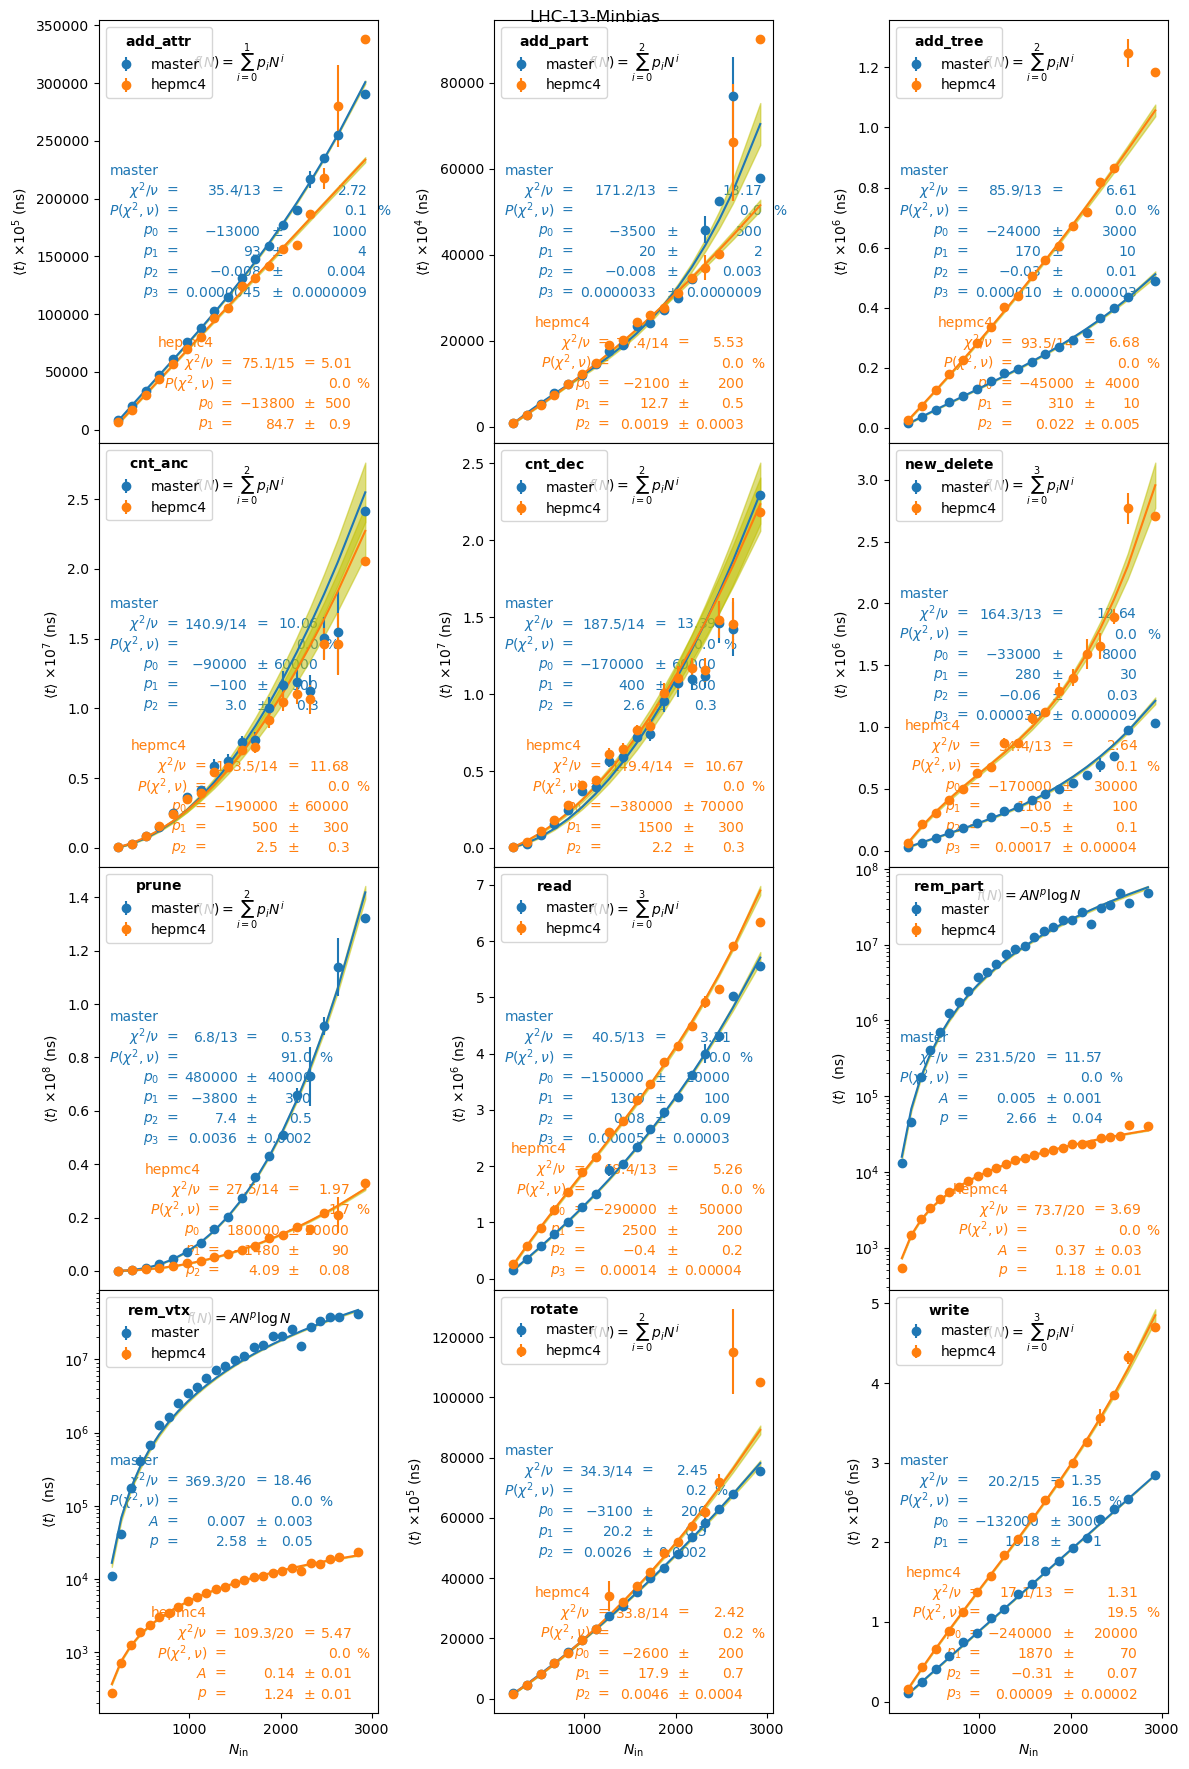

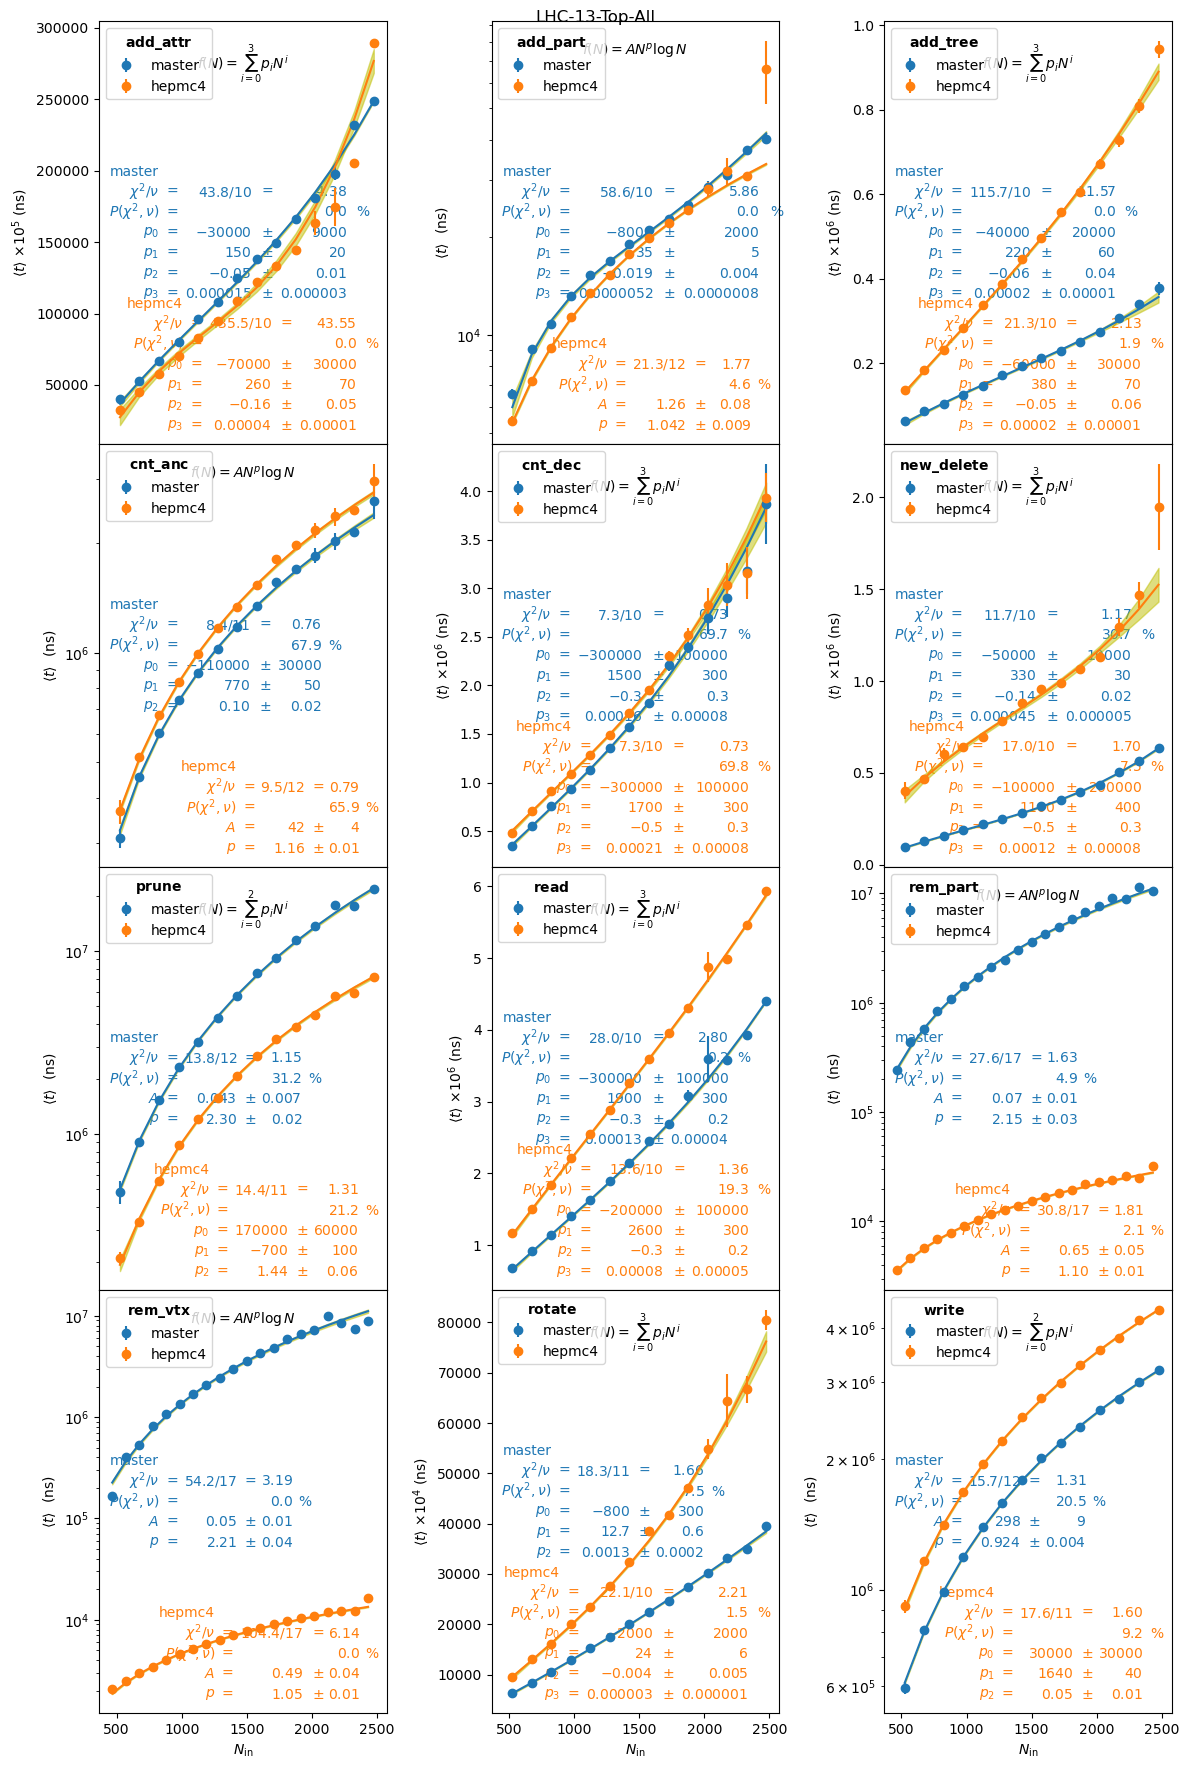

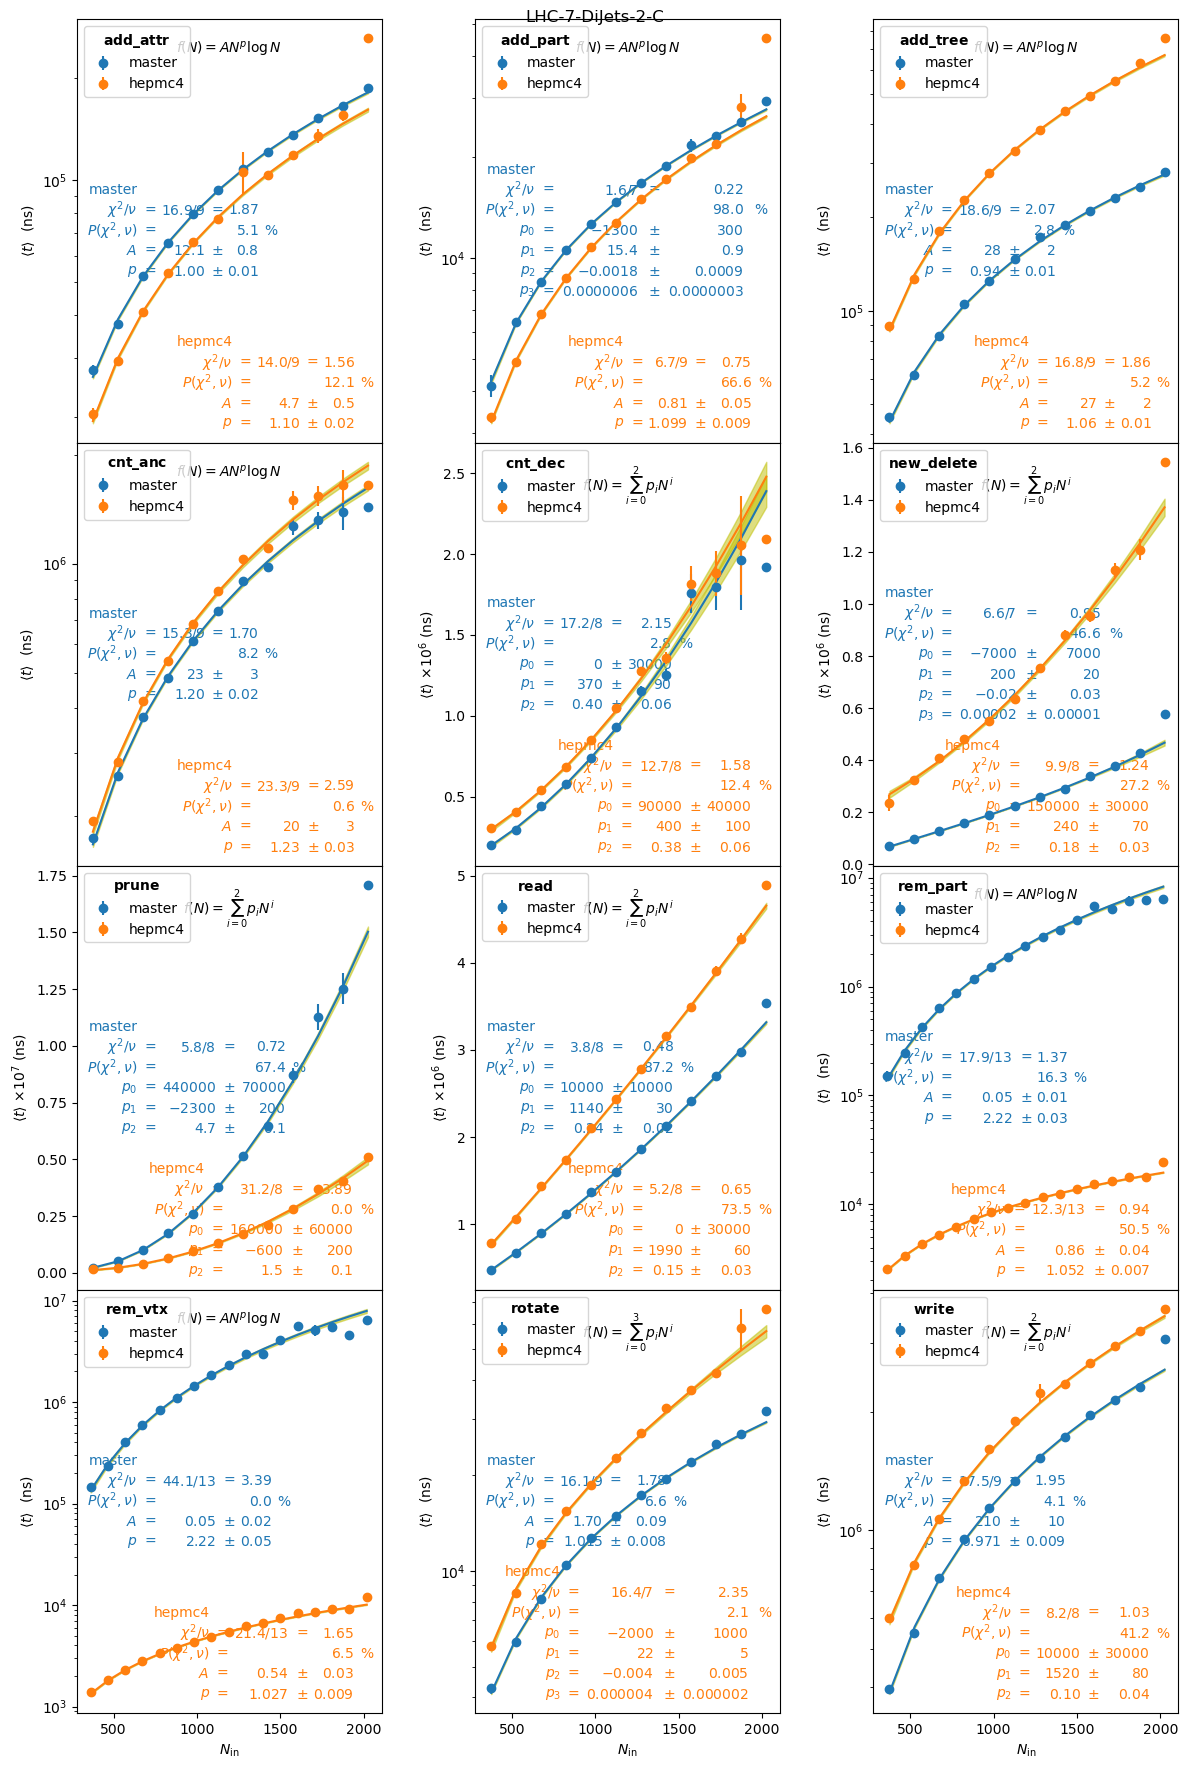

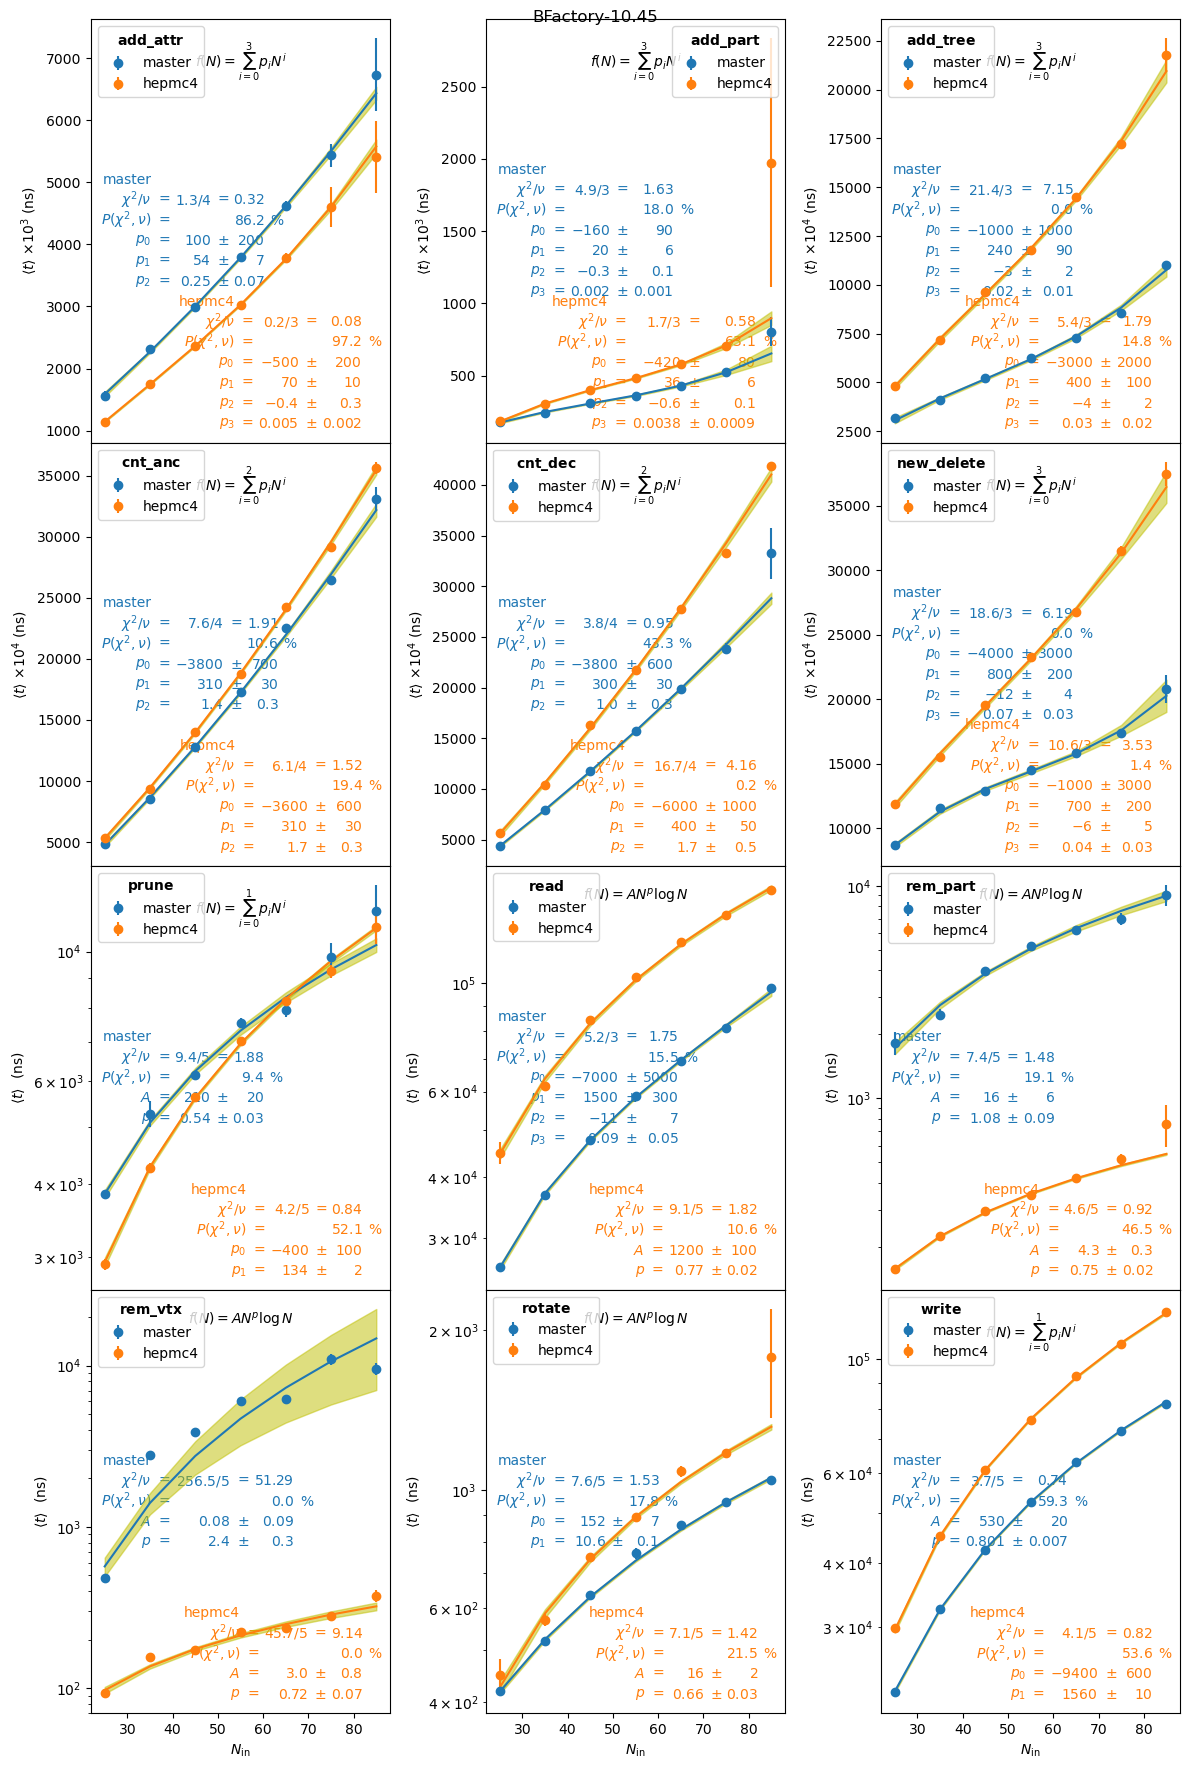

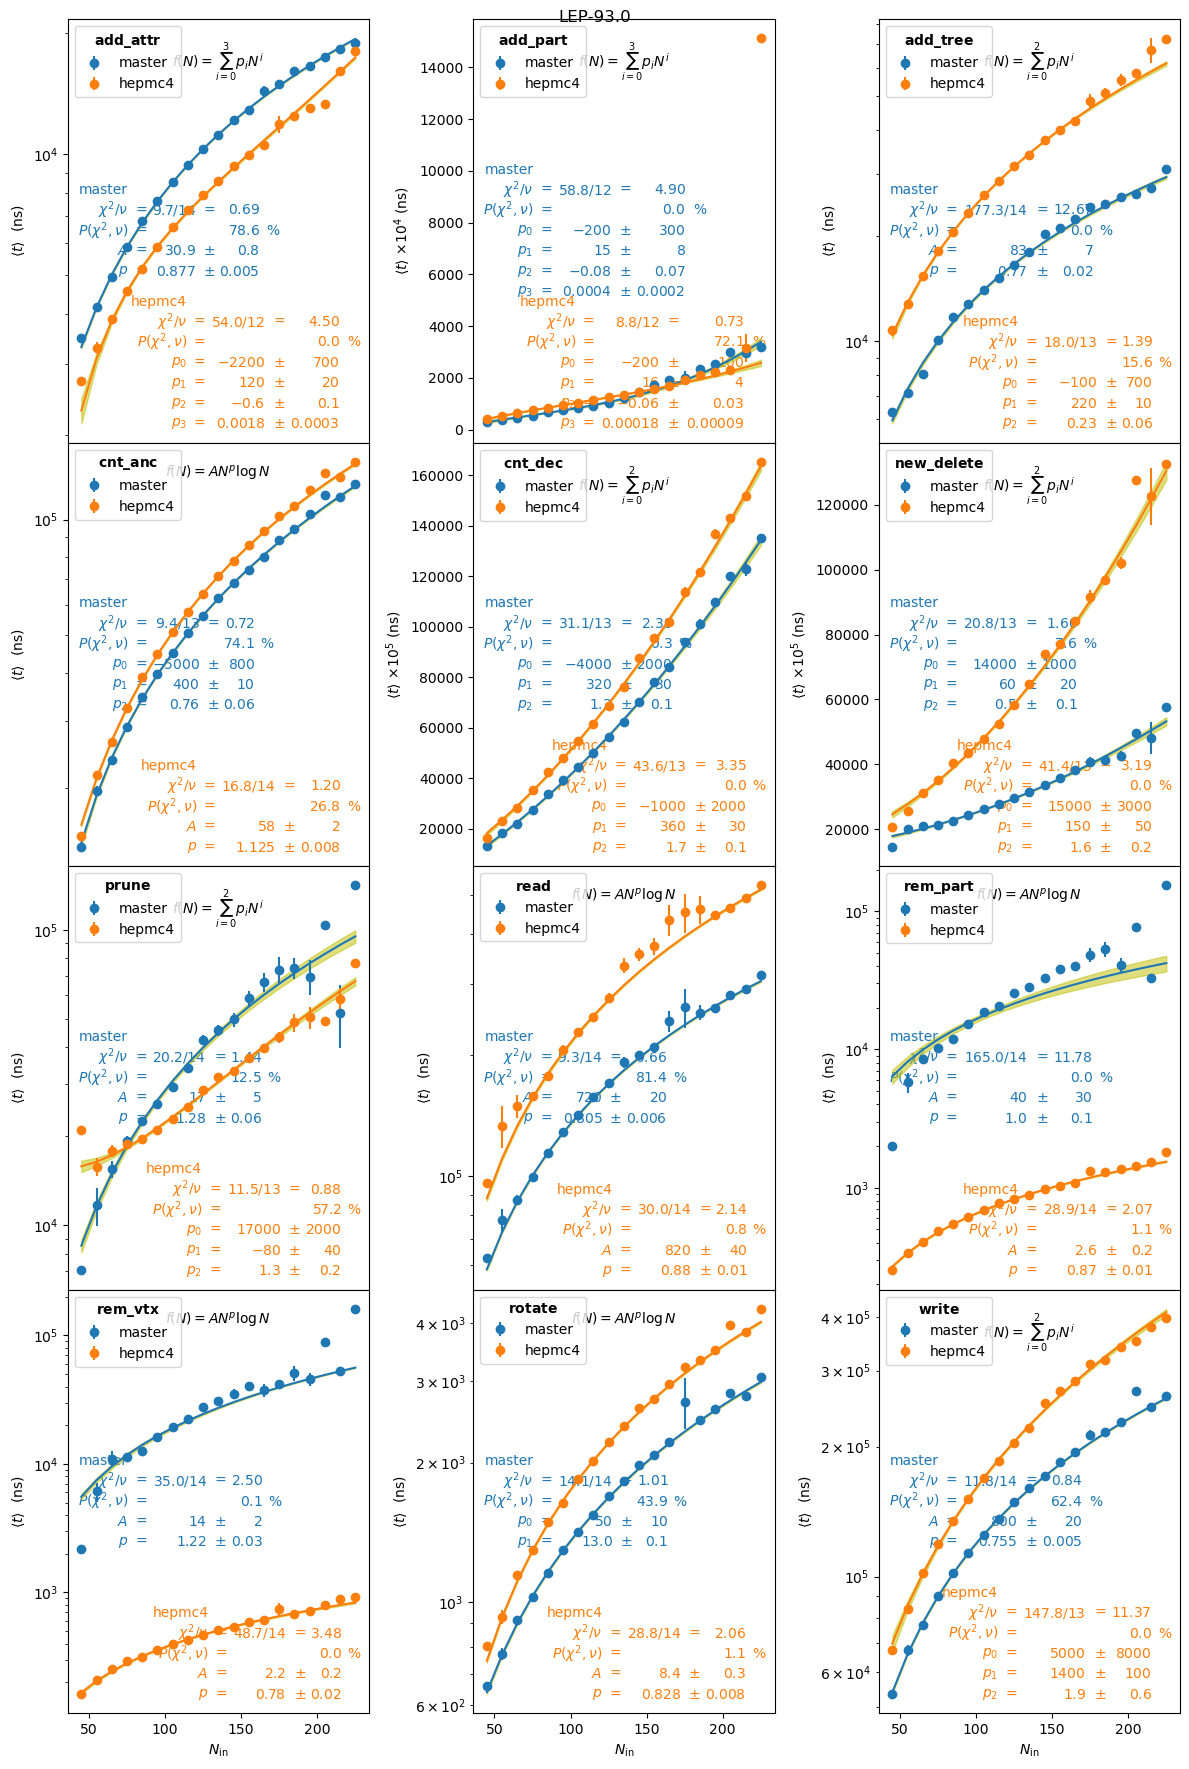

In [9]:
for dataset in datasets:
    bins = oneConfig.get(dataset,{}).get('bins',None)
    fig = tryAll(dataset=dataset,bins=bins,**opts)

## Reading data

This tests reading data in various formats.  Note, the `master` (HepMC3) data is the same as above, i.e., read from Asciiv2 input files.  

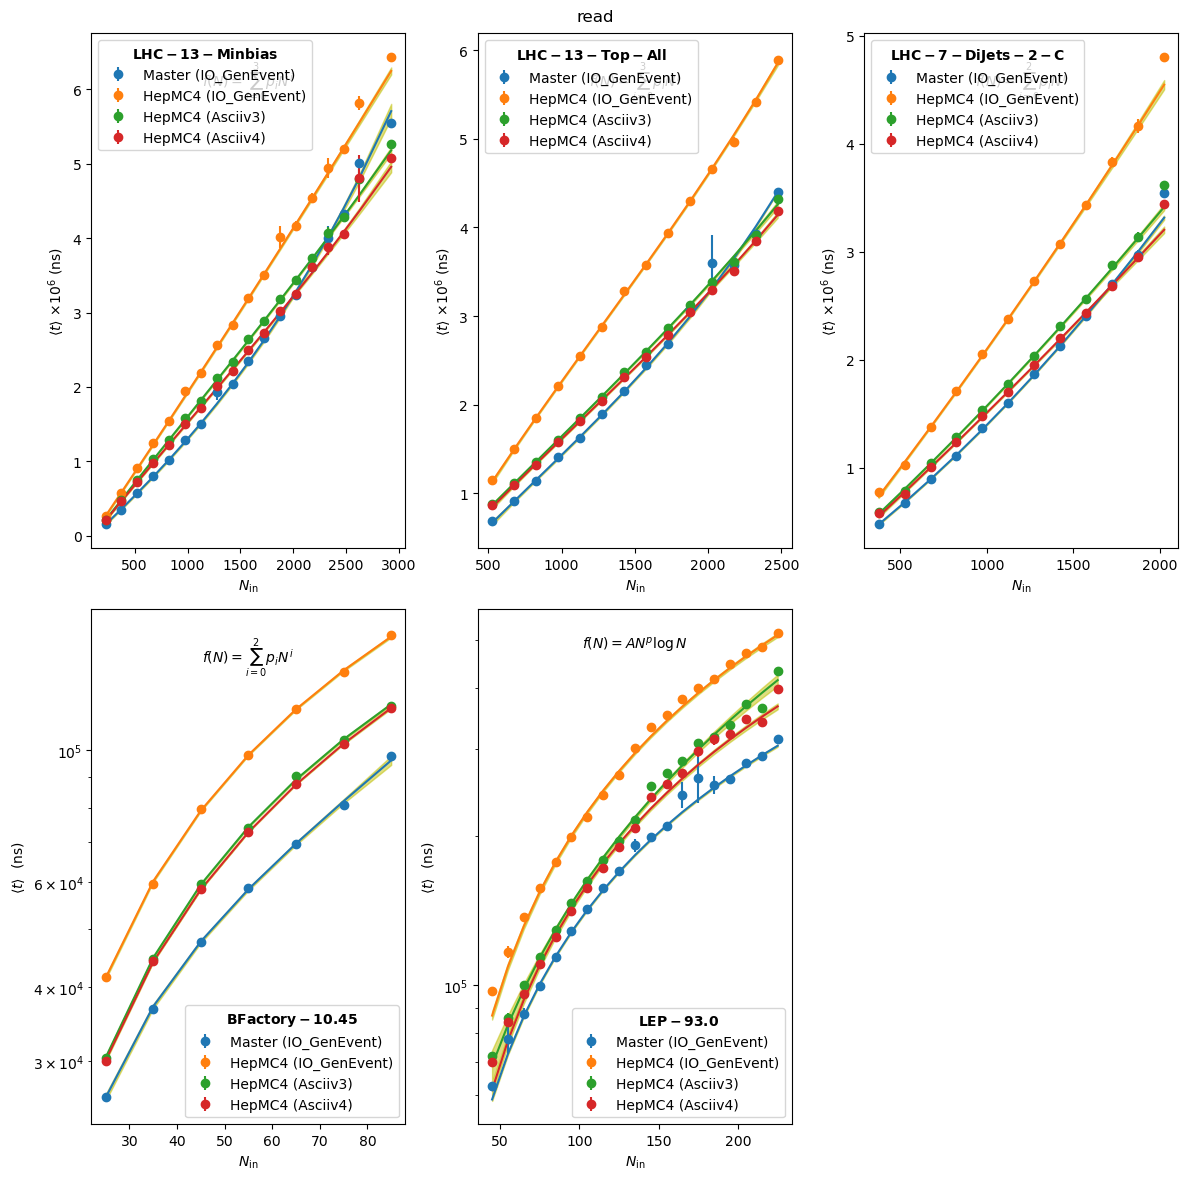

In [13]:
tryOneAll('read',datasets,
          versions=['master','hepmc4','hepmc4','hepmc4'],
           prefix=['../hepmc','../hepmc','../hepmc3','../hepmc4'],
           labels=['Master (IO_GenEvent)',
                   'HepMC4 (IO_GenEvent)',
                   'HepMC4 (Asciiv3)',
                   'HepMC4 (Asciiv4)']);